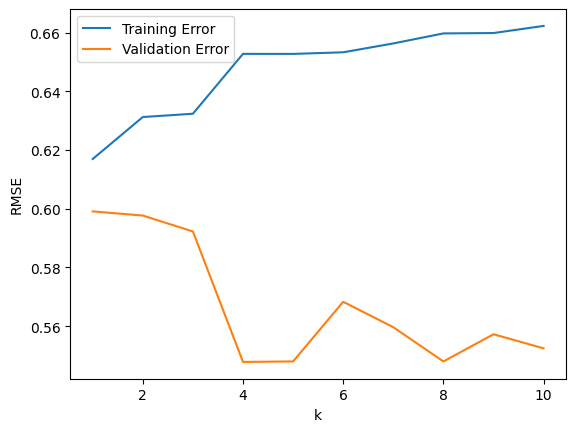

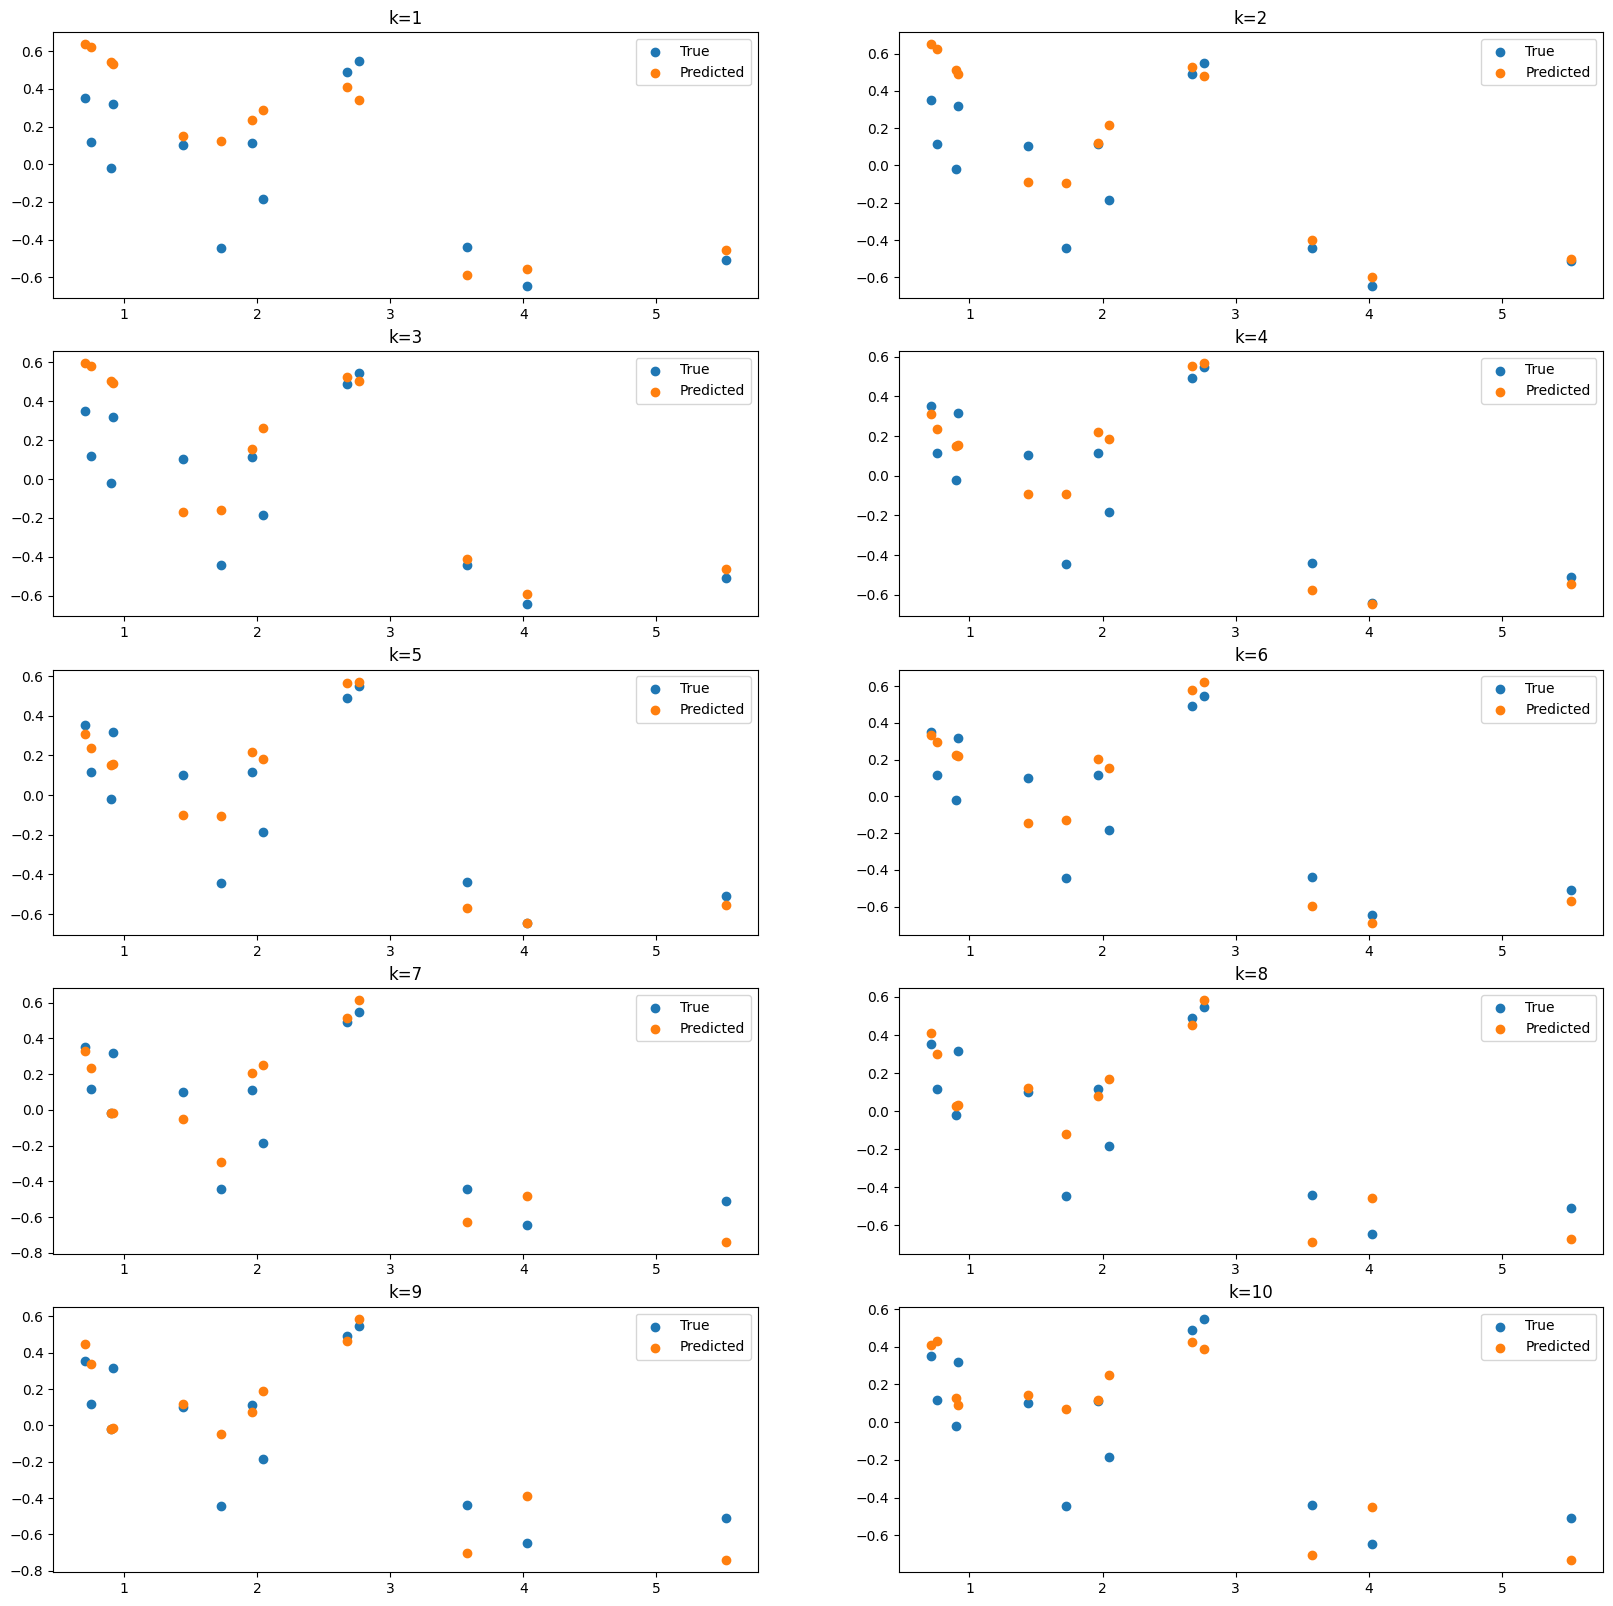

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import pinv
from sklearn.model_selection import train_test_split

class SinusoidalRegressor:
    def __init__(self):
        self.k = None
        self.weights = None

    def phi(self, x):
        """Generate basis functions for a given x"""
        return np.array([np.sin(i * x) if i % 2 == 1 else np.cos(i // 2 * x) for i in range(1, 2 * self.k + 2)])

    def fit(self, X_train, Y_train, k):
        """Train the model using pseudo-inverse"""
        self.k = k
        X_train = X_train.reshape(-1, 1)  # Ensure column vector
        Y_train = Y_train.reshape(-1, 1)  # Ensure column vector
        
        # Construct the design matrix Phi
        Phi = np.stack([self.phi(x) for x in X_train.flatten()], axis=0)  # Shape: (N, 2k+1)

        # Solve for weights using pseudo-inverse
        self.weights = pinv(Phi) @ Y_train  # Shape: (2k+1, 1)
        return self.weights

    def predict(self, X):
        """Make predictions"""
        if self.weights is None:
            raise ValueError("Model is not fitted yet.")
        X = X.reshape(-1, 1)  # Ensure column vector
        Phi = np.stack([self.phi(x) for x in X.flatten()], axis=0)  # Shape: (N, 2k+1)
        return Phi @ self.weights

    def rmse(self, X_val, Y_val):
        """Compute RMSE"""
        y_pred = self.predict(X_val)
        return np.sqrt(np.mean((Y_val - y_pred) ** 2))

# Load Data
np.random.seed(61)
csv_file = 'nonlinear-regression-data.csv'
data = pd.read_csv(csv_file)
x = np.array(data['X'])
y = np.array(data['Noisy_y'])

# Split Data
X_train, X_val, Y_train, Y_val = train_test_split(x, y, test_size=0.2, random_state=61)

# Initialize Model
sinusoidal_regressor = SinusoidalRegressor()

# Fit model and compute errors
train_errors = []
val_errors = []
for k in range(1, 11):
    sinusoidal_regressor.fit(X_train, Y_train, k)
    train_errors.append(sinusoidal_regressor.rmse(X_train, Y_train))
    val_errors.append(sinusoidal_regressor.rmse(X_val, Y_val))

# Plot Training and Validation Errors
plt.plot(range(1, 11), train_errors, label="Training Error")
plt.plot(range(1, 11), val_errors, label="Validation Error")
plt.xlabel("k")
plt.ylabel("RMSE")
plt.legend()
plt.show()

# Plot Predictions for Different k Values
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
for k in range(1, 11):
    sinusoidal_regressor.fit(X_train, Y_train, k)
    y_pred = sinusoidal_regressor.predict(X_val)
    
    ax = axs[(k - 1) // 2, (k - 1) % 2]
    ax.scatter(X_val, Y_val, label="True")
    ax.scatter(X_val, y_pred, label="Predicted")
    ax.set_title(f"k={k}")
    ax.legend()
plt.show()